## Escalamiento Lineal

- Los modelos de machine learning son eficientes en el rango [-1,1]. Convertir los datos en este rango facilita la convergencia de los modelos de ML.
- Los metodos mas usados son **max-min**, **Clipping** y **Z-score**. Los cuales de usan pricipalmente en data simetricamente distribuida.

- $X \rightarrow X_{s}$
- **min-max**: $X_{s} = \frac{2x-min-max}{max-min}$
- El clipping es un metodo que forza los outliers al min y max, sin embargo, por el hecho de que existan outliers no quiere decir que debamos eliminarlos. 
- **Z-score**: $X_{s} = \frac{x-\mu}{\sigma}$

## Transformacion no lineal
La utilizamos cuando la distrubucion de los datos no es simetrica. Las debemos usar antes de realizar escalamientos lineales.

- $X_{s} = tanh(\frac{x}{a}) \rightarrow$ El paramentro `a` permite defomarlos datos para que estos se vean mas simetricos. 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Mounted at /content/drive


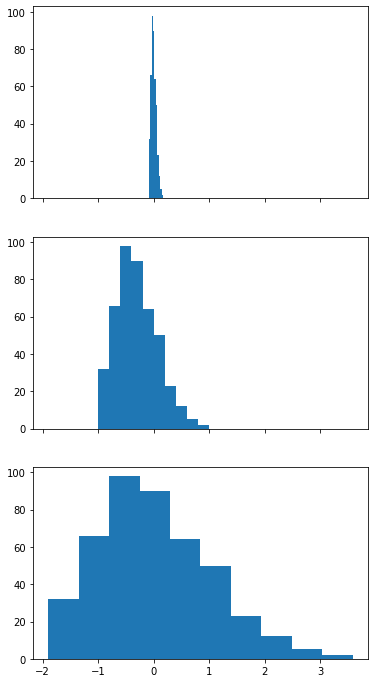

In [1]:
from numpy.ma.core import true_divide
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xlrd==1.2.0

plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10)

#Datasets: Permite cagar el data set de diabetes
#Linear_model: Permite realizar un regresion lineal sobre los datos
from sklearn import datasets, linear_model

from google.colab import drive
drive.mount('/content/drive')

X,y =  datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]
max_raw = max(raw)
min_raw = min(raw)
scaled_min_max = (2*raw -min_raw - max_raw)/(max_raw - min_raw)
scaled_z = (raw-raw.mean())/(raw.std())
fig, axs = plt.subplots(3,1, sharex=True, figsize=(6,12))
axs[0].hist(raw)
axs[1].hist(scaled_min_max)
axs[2].hist(scaled_z)
plt.show()
fig.tight_layout()

In [2]:
#Funcion para entrenar el modelo
def train_raw():
  linear_model.LinearRegression().fit(raw,y)

def train_scaled_min():
  linear_model.LinearRegression().fit(scaled_min_max,y)

def train_scaled_z():
  linear_model.LinearRegression().fit(scaled_z,y)

In [3]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time_min = timeit.timeit(train_scaled_min,number=100)
scaled_time_z = timeit.timeit(train_scaled_z,number=100)
#El tiempo de ejecucion se reduce en la medica que utilizamos modelos escalados
print(f'train raw: {round(raw_time,4)}, train_scaled_min: {round(scaled_time_min,4)},train_scaled_z: {round(scaled_time_z,4)}')

train raw: 0.0653, train_scaled_min: 0.0369,train_scaled_z: 0.0324


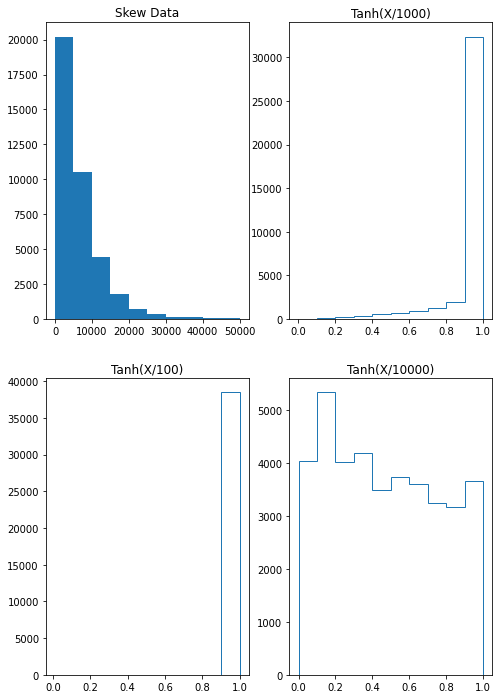

In [4]:
path = '/content/drive/MyDrive/conda_data_science/data/raw/'
df = pd.read_csv(f'{path}/cars.csv')

fig, axes = plt.subplots(2,2,figsize=(8,12))
axes[0,0].set_title('Skew Data')
axes[0,0].hist(df['price_usd'])
axes[1,0].set_title('Tanh(X/100)')
axes[1,0].hist(df['price_usd'].apply(lambda x:np.tanh(x/100)), histtype='step')
axes[0,1].set_title('Tanh(X/1000)')
axes[0,1].hist(df['price_usd'].apply(lambda x:np.tanh(x/1000)), histtype='step')
axes[1,1].set_title('Tanh(X/10000)')
axes[1,1].hist(df['price_usd'].apply(lambda x:np.tanh(x/10000)), histtype='step')
plt.show()

  ## Procesamiento de Variables Categoricas

In [5]:
#This column has 3 unique values
df['engine_type'].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [6]:
#If we categorize data into vectors It'll look like this, where get_dummies generate 3 independent columns
pd.get_dummies(df['engine_type']).shape

(38531, 3)

In [7]:
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [8]:
encoder.fit(df[['engine_type']])

OneHotEncoder(handle_unknown='ignore')

In [9]:
values = encoder.transform(df[['engine_type']]).toarray()
values.shape

(38531, 3)

## Correlaciones
**¿Qué es la correlación?**  
- La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante).

**¿Qué es la covarianza?**  
- Es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

**¿Qué es el coeficiente de correlación?**   
- El coeficiente de correlación es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación.



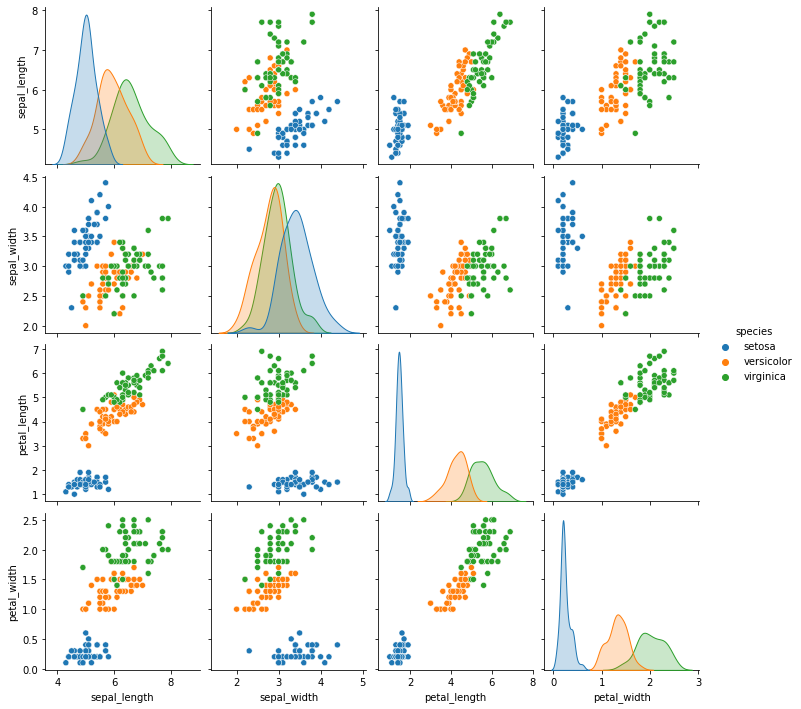

In [10]:
#Escalamos los datos con StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
iris = sns.load_dataset('iris')
sns.pairplot(iris,hue='species')
plt.show()

In [11]:
#Escalamos los datos
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    )
print(scaled.T.shape)
print(scaled.shape)

(4, 150)
(150, 4)


In [12]:
#Transponemos los datos
covariance_matrix = np.cov(scaled.T)
covariance_matrix.shape

(4, 4)

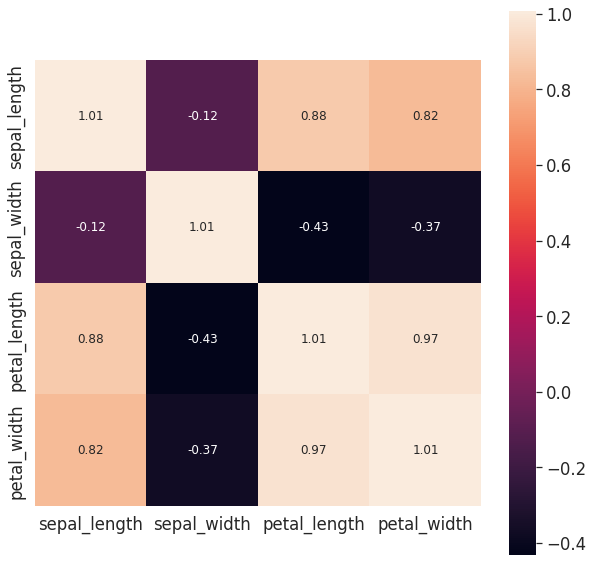

In [13]:
#Para calcular la covarianza debemos transponer los datos de (4, 150) a (150, 4)
covariance_matrix = np.cov(scaled.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [14]:
#Sin transponer los datos no obtenemos la matriz esperada
covariance_matrix = np.cov(scaled)
covariance_matrix.shape

(150, 150)

In [15]:
covariance_matrix = np.cov(scaled.T)

## Analisis de componentes principale

- Consiste en reducir el tamaño de los datos que aportan la misma informacion.
- Los valores propios y los vectores propios caracterizan la varianza de un conjunto de datos en terminos de las componentes pricipales `PCA`.
- Se busca capturar una catidad minima pero suficiente de varianza.


In [16]:
from sklearn.preprocessing import StandardScaler

#Alpicamos el escalamiento de los datos [-1,1]
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    )
#Creamos la matriz de covarianza a partir de los datos ya escaldos
covariance_matrix = np.cov(scaled.T)


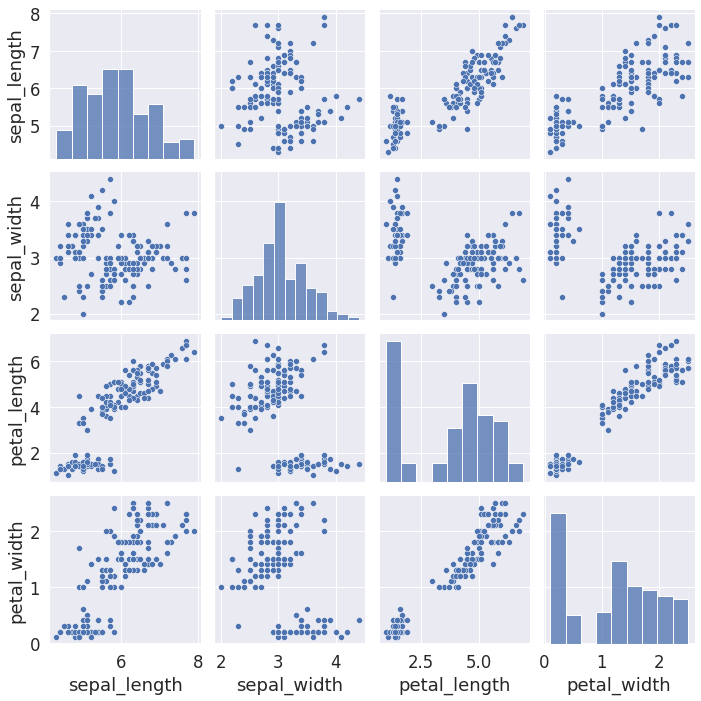

In [17]:
sns.pairplot(iris)

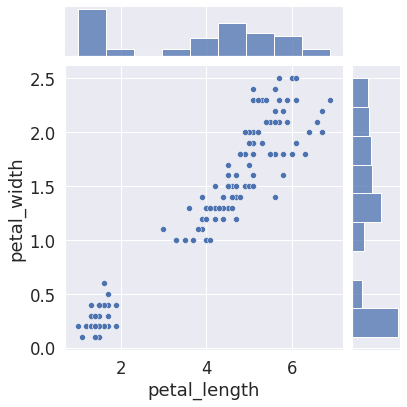

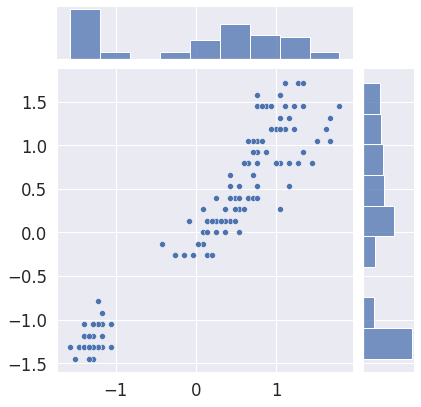

In [18]:
sns.jointplot( data=iris, x='petal_length', y='petal_width')
sns.jointplot(x=scaled[:,2], y=scaled[:,3])
fig.tight_layout()

In [19]:
#Calculamos los valores propios, esto es como descomponer una matriz 
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [20]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [21]:
#Determinamos la varianza explicada lo cual es basicamente convertir los eigenvalues
#a porcentajes
variance_explain = []
for i in eigen_values:
  variance_explain.append((i/sum(eigen_values))*100)
variance_explain

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

In [22]:
#Ya utilizamos numpy ahora haremos el mismo proceimiento con sklearn
from sklearn.decomposition import PCA
#Le indicamos que reduzca los datos en base a la varianza explicada
#Y que lo haga a solo dos componenetes
pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [23]:
#Esto coincide con los datos que calculamos de numpy
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [24]:
#Aqui creamos nuevos datos a partir de una transformacion de PCA
#es decir una nueva tabla con solo dos columnas
reduce_scaled = pca.transform(scaled)

#Añadimos los datos obtenidos al dataframe
iris['pca_1'] = reduce_scaled[:,0]
iris['pca_2'] = reduce_scaled[:,1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


<Figure size 864x576 with 0 Axes>

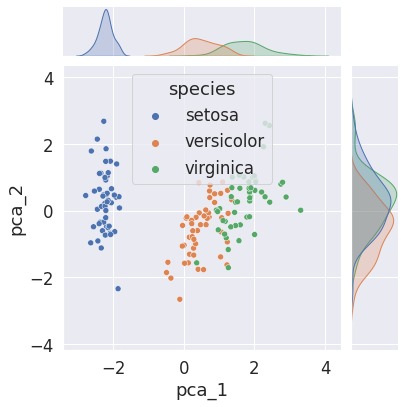

In [25]:
fig = plt.figure(figsize=(12,8))
sns.jointplot(data=iris, x='pca_1', y='pca_2', hue='species')
fig.tight_layout()
plt.show()

## Probabilidad  
###Fuentes de Incertidumbre:  

**Modelo**: Representacion Simplificada de la realidad. El hecho de simplicar la realidad en un modelo aumenta la incertidumfre de los datos.

**Modelo de Clasificacion de Texto `Clasificador Probabilistico`**: Si tenemos un texto y debemos indicar si pertenece a `[Sports,Games,Business]`. El modelo se basa en probabilidades para determinar a que categoria pertenece. 

1. El modelo selecciona ciertos atributos del texto como etiquetas, titulos etc, y los extrae.
2. El vector de atributos es entregado al modelo de ML. Puesto que el modelo conoce las posibles respuestas `[Sports,Games,Business]` decimos que es un modelo supervisado. El modelo debe ser previamente entrenado con la mayor cantidad de datos, de manera que al usar textos sin etiquetas el modelo pueda realizar una prediccion correcta. 
3. Todas la etapas de un modelo en ciertos aspectos involucran probabilidad. Entrenamiento: `[Arquitectura/Diseño,Paramentros/MLE,Hiper-parametros/Calibracion]`, Prediccion: Interpretacion de la prediccion. 





###Tipos de Probabilidad
¿Probabilidad en 2 Dados o dos sucesos?
- ¿Cada dado sea Par?
  - $P(A_{even},B_{even}) = \left [ \frac{3}{6} \right ]\left [ \frac{3}{6} \right ]=\left [ \frac{9}{36} \right ] \rightarrow P_{conjunta}$
- ¿Dice A sea par given Dice B sea par?
  - $P(A_{even}|B_{even}) = \left [ \frac{3}{6} \right ]\left [ \frac{3}{3} \right ]=\left [ \frac{9}{18} \right ] \rightarrow P_{condicional}$
- ¿Dice B sea par al lanzar los dos dados?
  - $P(B_{even}) = \left [ \frac{18}{36} \right ]$
- **Regla del Producto**
  - $P(A,B) = P(A|B)P(B) = \left [ \frac{9}{18} \right ]\left [ \frac{18}{36} \right ] =  \left [ \frac{9}{36} \right ]$
- **Conjunta `joint`**: Probabilidad de muchos sucesos en todo el espacio muestral.
- **Condicional**: Es aquella que restringe o acota el espacio muestral, es decir `no` cambia el numero de eventos existosos pero `si` el de los posibles. `Las probabilidades condicionales no reflejan relaciones de causalidad`
- **Marginal**: Consiste en obtener la probabilidad independiente de $P(A)$ o $P(B)$ a partir de $P(A \cap B)$ o probabilidad conjunta $P(A,B)$.

### Ejemplos de Probabilidad
**El siguiente ejemplo se realiza con dados**  

A. = {Get 4},
B. = {Get Even},
C. = {Get Odd}

1. $P(A) = \left [ \frac{1}{6} \right ]$
2. $P(A|B) = \left [ \frac{1}{3} \right ]$ Quiere decir, el hecho de que haya ocurrido **B** aumenta la probabilidad de que ocurra **A**. $\left [ \frac{1}{3} \right ] > \left [ \frac{1}{6} \right ]$ En este caso positivamente correlacionados.
3. $P(A|C) = 0$ Estan correlacionado negativamente, es decir son eventos excluyentes. Y no se debe confundir con independientes.   


**Juego de la Ruleta**   
El conjunto de opciones por las que aposto cada jugador son exluyentes ya que no hay ningun conjunto de interseccion.    

- Opciones de los Jugadores sin Interseccion
  - **player_a** = {1,2,3,4}    
  - **player_b** = {5,6,7,8}

1. $P(2) = 1/8 $
2. $P(1|b) = 0/4$

- Opciones de los Jugadores con Interseccion
  - **player_a** = {1,2,3,4}    
  - **player_b** = {5,6,7,4}
1. $P(1|b) = 1/4$ Que salga 1 dado que gano b.

- Opciones de los Jugadores
  - **player_a** = {1,2,3,4}    
  - **player_b** = {2,3,6,7}
1. $P(a|b) = 2/4$

###Ejemplos avanzados
**Paradoja ¿niño o niña?**
1. Una mujertiene dos bebes donde el mayor es varon.
2. Una mujer tiene dos bebes donde uno de ellos es varon.
¿Cual es la probabilidad de que esta mujer tenga dos hijos varones?  

1. $P(MM) = 1/4$
2. $P(MM | Mayor M) = 1/2$
3. $P(MM | Alguno M) = 1/3$

**Problema de Monty Hall**
En general la probabilidades cambian en la medica que hay un cambio en la informacion.   

![monty-hall](https://i.ibb.co/sF1ybPL/monty.png)

###¿Qué es una distribución?
Una distribucion de probabilidad es una funcion que toma una variable aleatoria y a cada uno de sus posibles estados en el espacio muestral le asigna una probabilidad. $P(X=x)$ es una funcion de la variable aleatoria $X_{aleatoria}$. 

- Las letras mayusculas $X$ se usan para notar variables aleatorias y las minusculas $x$ para valores en el espacio muestral.
- Las funciones tienen dominios $Dom_{X}$ = [Discreto,Continuo].
- A la distribucion tambien se le denomina densidad de probabilidad.
- Se conoce como distribucion acumulada a la integral de una distribucion para un rango dado que puede ser discreto o continuo.  

###Distribuciones discretas
**Distribucion de Bernulli** Ocurrencias Binarias  

- **Simple**   

Lanzar una moneda $P(X=1) = p$ y respectivamente $P(X=0) = 1-p$
- **Compleja**   

Lanzar Varias monedas, es decir secuencias repetitivas de varios eventos binarios o bernulli, entonces hablamos de la distribucion binomial. 
![bernulli](https://i.ibb.co/HY9VnSw/bernulli.png)   

Secuencias repetitivas para `n-lanzamientos` y `k-caras` donde el espacio muestral puede ser muy grande, entoces utilizamos una distribucion binomial.

![dis-binomial](https://i.ibb.co/X5dwXX8/binomial.png)
- **Formula de distribucion Binomial**
$P(k;n;p)= \binom{n}{k}p^{k}(1-p)^{(n-k)}$



In [26]:
#Here the libraries we'll be using in binomial ditribution
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

#K: N de exitos
#n: N lanzamientos
#p: Porbabilidad de Exito
def my_binomial(k,n,p):
  return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

In [27]:
#Calcular la probabilidad 2 caras,3 lanzamientos, con una probabilidad 
#equilibrada de 0.5, es decir las monedas pesan igual.
my_binomial(2,3,0.5)

0.375

In [28]:
#Obtener la dist binomial con scipy
#binom(k,p) ->(Exitos,P equilibrada)
dist_scipy = binom(3,0.5)
#probability mass function (Densidad de Probabilidad)
#pmf(n) N lanzamientos
dist_scipy.pmf(2)

0.375

In [29]:
#Cumulative density function, calcula la distribucion de 
#probabilidad acumulada o area bajo la curva de 0 a 2 lanzamientos
dist_scipy.cdf(2)

0.875

###Escuela Frecuentista
Los algoritmos deterministicos o generadores aleatorios permiten simular eventos aleatorios cercanos a la vida real.

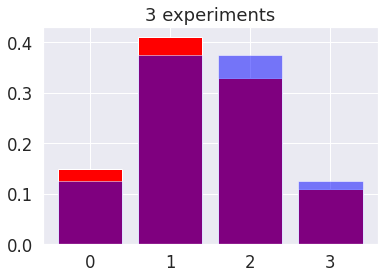

In [30]:
#Simulacion de n lanzamientos con monedas quilibradas, donde k = binomial(n,p) o nuemero de exitos
#funcion de numpy que funciona como generador aleatorio, P=Probabilidad Equilibrada, N=numero de lanzamientos

p=0.5
n=3
values=[0,1,2,3]
def plot_flip_coins(n,p,values):
  arr = np.array([binomial(n,p) for _ in np.arange(100)])
  simulation = np.unique(arr, return_counts=True)[1]/len(arr)
  #scipy.stats binom(n,p)
  theoric = [round(binom(n,p).pmf(k),3) for k in values]
  plt.bar(values,simulation, color='red')
  plt.bar(values,theoric, color='blue', alpha=0.5)
  plt.title(f'{n} experiments')
  plt.show()

plot_flip_coins(n,p,values)

### Distribucion normal gaussiana

$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

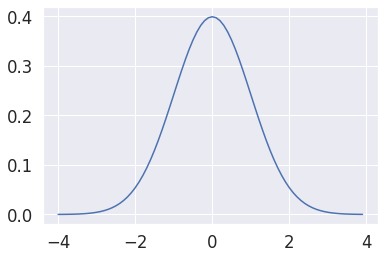

In [31]:
# definimos nuestra distribución gaussiana
def gaussian(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)
plt.show()

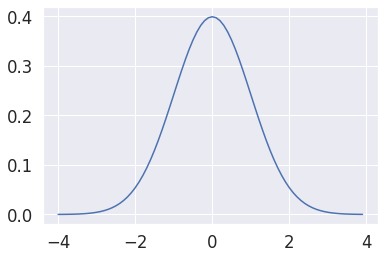

In [32]:
# usando scipy
from scipy.stats import norm 
#norm(median,std)
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
#pdf:Probability density Function dist.pdf(value_x)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)
plt.show()

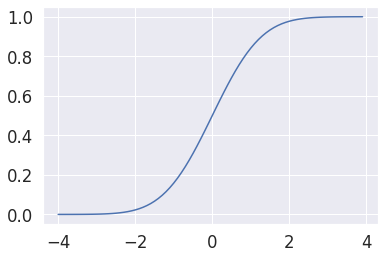

In [33]:
# calculando la distribución acumulada, igualmente indicamos norm(median,std), dist.cdf(value_x)
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x, y)
plt.show()

## Distribución normal (gausiana) a partir de los datos

These data on housefly wing lengths provide an excellent example of normally distributed data from the field of biometry.  The normal distribution, one of the most widely used distributions in statistics, is often referred to as the Gaussian or bell-shaped distribution. 
* *El archivo [excel](https://seattlecentral.edu/qelp/sets/057/057.html)*


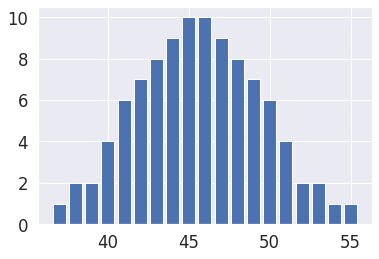

In [34]:
housefly_wings = pd.read_excel(f'{path}/s057.xls')
#Tomamos la normally Distributed Housefly Wing Lengths, filas [4:0] 
arr = housefly_wings['Normally Distributed Housefly Wing Lengths'].loc[4:]
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist)
plt.show()

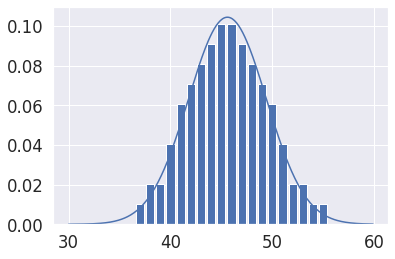

In [35]:
# estimación de la distribución de probabilidad
mu = arr.mean()

#distribución teórica
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

#Graficamos tanto distribución teórica como distribucion real de los datos
values, dist = np.unique(arr, return_counts=True)
#Dividimos dist/len(arr) para que dist se de en terminos de porcentaje, recordando que la 
#distribucion teorica tiene un rango de (0,1)
plt.bar(values, dist/len(arr))  
plt.show()

##¿Cómo estimar una distribución?


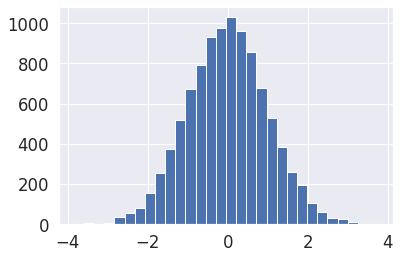

In [36]:
#Generador aleatorio basado en distribuciones normales si importamos una funcion espcifica del modulo
#numply.random solo cambia que el codigo es mas legible
from numpy.random import normal
#np.random.normal(loc=mean,scale=std,size=#data)
norm_dist_random = np.random.normal(size=10000) 
plt.hist(norm_dist_random,bins=30)
plt.show()

## Estimación paramétrica

La estimación paramétrica es una herramienta que las empresas utilizan para evaluar factores importantes de un proyecto, como el tiempo total, el coste o los recursos que se necesitan para completarlo. 

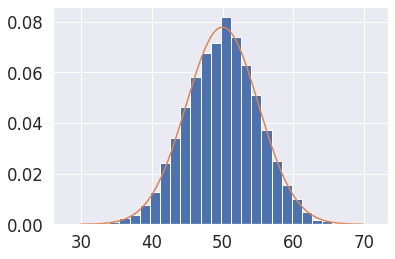

In [37]:
#1. Obtenemos los datos originales data_sample, graficamos el histograma usamos atributo density=True, es decir en rango de 0-1
#2. Graficamos pdf para cada valor de x, pero antes debemos instanciar dist = norm(mu, sigma)

data_sample = np.random.normal(loc=50, scale=5,size=10000) 
values = np.arange(30,70,0.1)
mu = data_sample.mean()
sigma = data_sample.std()
#Instancimos la distribucion, indicando la media y la std
dist = norm(mu, sigma)
#Calculamos Y para cada valor de X
probabilities = [dist.pdf(value) for value in values]
plt.hist(data_sample,bins=30, density=True)
#Graficamos la distribucion plt.plot(X,Y)
plt.plot(values,probabilities)
plt.show()

###Estimación [No Paramétrica](https://scikit-learn.org/stable/modules/density.html) - Union de funciones para Distribuciones Multimodales

La idea general de la estimación no paramétrica es usar la información del pasado que más se parezca a la actual sin establecer ningún modelo concreto de predicción.

`Kernel Density estimation`: Debemos indicar los siguientes paramentros. 
* [parámetro de suavizado]: Smoothing parameter 
* [función base]: Basis function (Que funcion se adapta mas a los datos)

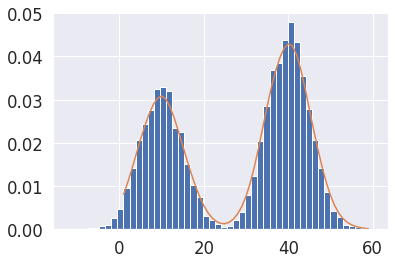

In [38]:
#hstack permite jutar varios arreglos
from numpy import hstack
#Importamo la funcion KernelDensityFunction
from sklearn.neighbors import KernelDensity

#Construimos una distribución bimodal a partir de dos distribuciones normales con diferente
#media y cantidad de datos pero misma std
sample1 = normal(loc=10, scale=5, size=5000)
sample2 = normal(loc=40, scale=5, size=7000)
#Hacemos un stack de los datos para unirlos en el eje de las columnas
sample = hstack((sample1, sample2))
#Hacemos reshape para que todos los datos queden en una sola columna, el reshape es obligatorio
#siempre que usamos sklearn
sample = sample.reshape((len(sample), 1))

#Creamos un modelo KernelDensity(bandwidth=suavizado, kernel='gaussian')
model = KernelDensity(bandwidth=2, kernel='gaussian')
#Ajustamos el modelo a los datos es decir automaticamente obtiene la media y std de las distribuciones
#Aqui estamos aplicando MLE 
model.fit(sample)

#Los values no pueden ser de tipo lista sino de tipo array y la funcion np.asarray(list) -> array
values = np.asarray([value for value in range(1, 60)])
#Ademas hacemos el reshape nuevamente, es obligatorio
values = values.reshape((len(values), 1))

#model.score_samples(x) - Compute the log-likelihood of each sample under the model. - Obtenermos la probabilidad logaritmica
#El underflow es un problema que surge cuando sobre pasamos el limite inferior de presicion 
#que una maquina puede computar, es decir numeros muy pequeños. Con score_samples(x) expresamos las probabilidades, no como multiplicaciones,
#sino como sumas asi evitamos el under flow que es comun en casos de probabilidad
probabilities = model.score_samples(values)
#calculamos la exponencial de probabilidad logaritmica
probabilities = np.exp(probabilities)

#Graficamos datos vs kdf
plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)
plt.show()

### Maximum likelihood estimation [(MLE)](https://www.youtube.com/watch?v=XepXtl9YKwc&t=87s)

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable. 

- Es un framework para la estimacion de densidades de probabilidad dentro de un esquema de trabajo muy general.
- El Maching Learning consiste en ajustar densidades a datos. **Supervisado**: `[Clasificacion, Regresion]` **No-Supervisado**:`[Clusterizacion]`

### Regresion Lineal con MLE
- En el colegio 🥱$y= mx(Pediente) + b(Pto_Corte)$, En Machine Learning 😎 $y=b_{0}x(Weight) + b_{1}(Bias)$ en escencia es lo mismo. 
- En una regresion lineal $y=y_{i}-(mx_{i}+b)$ 

- **MLE** puede aplicarse en cualquier modelo **h**, $P(x|y) \to max\sum_{i}logP(y_{i}|x_{i};h)$

- Matematicamente una **RL** explicada a traves de una **Distribucion Gaussiana** $$P(X) = max\left\{\sum log(\frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{y_{i}-(mx_{i}+b)}{\sigma} \right)^2 \right])}\right\}$$ 

![explicaciom](https://i.ibb.co/p3CMfwR/explanation-MLE.png)

###En conclusion esta seria el resultado del MLE aplicado a una RL
![RL](https://i.ibb.co/DRymVD1/rl.png)

###Regresion Logistica
Resuelve problemas de clasificacion, **!No resuelve problemas de [Regresion Lineal](https://www.youtube.com/watch?v=xxk8378kn7s)!**. La funcion usa es la sigmiode $\to y=\frac{1}{1-exp^{-1}}$

![RLs](https://static.platzi.com/media/user_upload/6-190acabb-86c0-459e-8f88-383bac96734e.jpg)

- **Cross Entrophy**: Es la funcion de error que busca minimizarse en un problema de clasificacion binario, es una consecuencia del **MLE**, cuando buscamos una funcion de probabilidad que nos de los valores maximos cuando las predicciones del modelo por medio de la sigmiode se hacercan a las clases del conjunto de datos que tengo. Es necesario entender por que se usa esta funcion de error en un problema binario. 

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

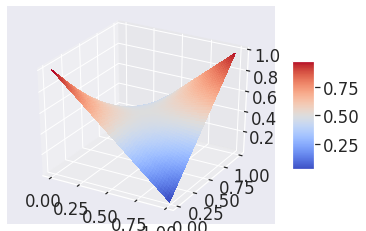

In [39]:
#Regresion Logistica
#Permite crear graficos 3D
from mpl_toolkits.mplot3d import Axes3D  

#Cm permite acceder a diferentes paletas de colores
from matplotlib import cm
#yp es y gorrito
def likelihood(y, yp):
  return yp*y+(1-yp)*(1-y)

#Crear lienzo y axes 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
#Idicamos los rangos del grafico
Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)
#Cuadricula para grafico 3D
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

#plot_surface(X, Y, Z) donde Z = likelihood. 
surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#Creamos una barra de colores 
fig.colorbar(surf, shrink=0.5, aspect=5)
  
plt.show()

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

### Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1-\exp{(-\text{log-odds})}}
$$

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el [dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) [Iris]( https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [40]:
from sklearn.datasets import load_iris

#Ya tiene implementado todo lo que necesiamos para un modelos de
#regresion logistica
from sklearn.linear_model import LogisticRegression

#Guardamos en un array el nombre de los 
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
#Asignamos los datos tal como lo indica sklearn
X, y = load_iris(return_X_y=True)

In [41]:
#random_state: Es un generador aleatorio que inicializa las variables del modelo
#solver='liblinear': Es el metodo de optimizacion del modelo, es el que busca la mejor combinacion de parametros
#.fit(X-Entrada,Y-SalidaModelo): Permite que el modelo se ajuste a los datos del dataset 
clasifier = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100],y[:100])
#Nos muestra los coheficientes (B0, B1, Bi)Pesos que indican la relavancia de las variables al momento de predecir.
#Es decir los parametros que mejor ajustan las predicciones del modelo de clasificacion a las categorias dadas. 
clasifier.coef_

#La regresion logistica tambien se puede entender como un problema de MLE, justificando el uso de la funcion costo (cross-entrophy)

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

### Teorema de Bayes
Refleja una **filosofia de interpretacion** muy diferente sobre las probabilidades que obtenemos de sucesos aleatorios. El modelo de bayes busca corregir el problema que tiene la escuela frecuentista respecto a que las probabilidades teoricas no coinciden inicialmente con las reales. El teorema de compone de 4 elementos fundamentales.   

![bayes](https://i.ibb.co/R7tJHhY/bayes.png)
  1. **Probabilidades priori**: Probabilidad Inicial de una variable aleatoria. Esta creencia no necesariamente refleja la realidad.
  2. **Probabilidades Evidencia**: Justifica la ocurrencia de un evento dada una evidencia
  3. **Probabilidades de Verocimilitud**
  4. **Probabilidades Posteriori**.

La evidencia modifica las probabilidades reales. 
###Test Medico: Mamografia(Sensitividad 80%)
El dispositivo de deteccion del cancer tiene una sesitividad del 80% 
$P(X=1|Y=1)$=80% $\to$ Es decir, tiene cancer pero aun asi la probabilidad es del 80%. 
- **Verocimilitud**: La sensitividad es un parametro que se obtiene a partir de resultados que ya estaban verificados. Ahora el 80% no es necesariamente la probabilidad de tener cancer.   
- **Priori**Si dejamos de lado el dispositivo, tenemos como conocimiento previo que la probabilidad de tener de tener cancer es del 0.04%.
- La probabilidad de ser un falso positivo con el dispositivo es del 10%

![Bayes](https://i.ibb.co/ZHhkfCH/bayes.png)

###Bayes en machine learning
En la escuela frecuentista usamos **MLE**, sin embargo, la escuela bayesiana tiene una analogo **MAP**(Maximun Aposteriori) Maximisar la probabilidad posterior del teorena de Bayes. Si recordamos el Teorema de Bayes tiene cuatro partes.    

![bayes](https://i.ibb.co/R7tJHhY/bayes.png)
- En **MLE** nos preocupamos por estimar la maxima verocimilitud que tambien se encuentra en teorema de Bayes, pero en **MAP** nos interesa optimizar o estima la Probabilidad Posteriori.    
![MAP](https://i.ibb.co/zsznWmd/MAP.png)

- La evidencia se desprecia en **MAP** por que sin importar los cual es modelo que estamos usando la evidencia siempre es la misma. Todos los probelas de optimizacion bayesiana se reducen solo a:  $max P(h|D) \to max P(D|h)P(h)$ donde todo depende de quien es **h**. Donde no estimamos **MLE**(Obener paramentros de modelo a partir de los datos) sino $max P(h|D)$(Obtener datos a partir de los paramentros) los problemas de clasificion con bayes tambien cambian. 

- **Clasificador de Naive Bayes**
![NB](https://i.ibb.co/Ln1vvzq/NB.png)